# Bayesian inference

Bayesian thinking starts from Bayes theorem
$$
P(Y|X)=\frac{P(X|Y)P(Y)}{P(X)}.
$$
For example if we model an random output variable $y$ through a parametric model 
$$
y\sim f(\alpha)
$$
possibly also including input variables $x$ like
$$
y\sim f(x,\alpha).
$$
Then if is the given data - set of observations of the output variable ($D=\{y_i,i=1..N\}$) and also input variables if relevant ($D=\{(y_i,x_i),i=1..N\}$), Bayes theorem
$$
P(\alpha|D)=\frac{P(D|\alpha)P(\alpha)}{P(D)}
$$
or going from probabilities (discrete variables) to densities (continous variables):
$$
p(\alpha|D)=\frac{p(D|\alpha)p(\alpha)}{p(D)}
$$
provides a direct probabilitstic estimate for an unknown parameter $\alpha$ given the observations $D$.
The denominator $p(D)=\int p(D|\beta)p(\beta)d\beta$ plays a role of a normalization constant here (does not depend on $\alpha$), so one can say
$$
p(\alpha|D)\sim p(D|\alpha)p(\alpha).
$$
The density (or probability) $p(D|\alpha)$ is given by the model's likelihood function, while $p(\alpha)$ is somewhat unknown so far. This term incorporates our prior knowledge/beliefs of $\alpha$ before we encontered observations $D$. Its not that we have to possess any knowledge here - if there is no prior knowledge there is always a way of saying "we do not know" by considering an "uninformative" uniform prior distribution for $\alpha$. But beyond that Bayesian framework provides an additional poweful advance vs classical model estimation framework we've been considering so far: it also allows us to incorporate any prior knowledge/beliefs re the model parameters if we have any.  

## 1. Simple example - flipping a coin

Consider a coin tossing experiment, where we are trying to figure out how fair/unfair the coin is, i.e. the probability $\alpha$ of getting it heads ($c=1$) vs a probability $1-p$ or getting it tails ($c=0$).

Consider we're having some prior belief about the coin, characterized by a probability distribution $p(\alpha)$ for $\alpha$ considered as a random variable. If we do not have any specific belief about how fair/unfair the coin is we can start from an uninformative uniform prior $\alpha\sim Unif(0,1)$, letting $p(\alpha)=1$.

See how one signle coin tossing affects our belief. If coin comes up heads:
$$
p(\alpha|c=1)\sim P(c=1|\alpha)p(\alpha)=\alpha p(\alpha).
$$
Otherwise
$$
p(\alpha|c=0)\sim P(c=0|\alpha)p(\alpha)=(1-\alpha) p(\alpha).
$$
Then if we observe a series of discrete outcomes $c=y_i, i=1..N$, sequentially changing our current belief taken as prior to the posterior as above, our final posterior would become
$$
p(\alpha|D)\sim \alpha^{\sum y_i}(1-\alpha)^{N-\sum y_i} p(\alpha).
$$
In case of uninformative prior $p(\alpha)\equiv 1$ this leads to a beta distribution
$$
\alpha\sim B\left(1+\sum y_i,N+1-\sum y_i\right).
$$
Now if after a certain series of experiments with $t$ tails and $h$ heads, having a current belief
$$
\alpha\sim B(h+1,t+1)
$$
which at that point can be considered as prior, we make another experiment with a certain outcome $y=0,1$, then the posterior distribution becomes
$$
p(\alpha|y)=B(h+1+y,t+2-y).
$$
This means that beta-distributed prior for coin tossing always leads to a beta-distributed posterior. Based on that a family of beta-distributions is called a conjugate prior for a series of Bernoilli experiments (i.e. for a Binomial model).



# 2. Another example - fitting a normal distribution 

Consider another example of real-valued observations $D=\{y_i,i=1..N\}$ for a random variable $y$ which is supposed to follow a normal distribution. Assume that we know the variance $\sigma^2$, but trying to estimate the mean $\mu$. A simple frequentist way of doing so would be to simply let 
$$
\mu=\frac{\sum_i y_i}{N}
$$
be a sample mean. In case of a normally distributed variable this makes sense (not always however - this won't work in case of a lognormal distribution for example), but does not allow to incorporate any prior knowledge about $\mu$ and also can not answer a question of how accurate an estimate actually is. 

From a Bayesian perspective in case of a prior belief
$$
\mu\sim {\cal N}(\mu^*,\sigma^*)
$$
each new observation $y_i$ changes the posterior to
$$
p(\mu|y=y_i)\sim p(y=y_i|\mu)p(\mu)\sim e^{\frac{-(y_i-\mu)^2}{2\sigma^2}}e^{\frac{-(\mu-\mu^*)^2}{2(\sigma^*)^2}}=e^{-\frac{(y_i-\mu)^2}{2\sigma^2}-\frac{(\mu-\mu^*)^2}{2(\sigma^*)^2}}\sim
$$$$
\sim e^{-\mu^2\frac{(\sigma^*)^2+\sigma^2}{2\sigma^2(\sigma^*)^2}+\mu\frac{(\sigma^*)^2 y_i+\sigma^2 \mu^*}{\sigma^2(\sigma^*)^2}}
\sim e^{-\frac{\left(\mu-\frac{(\sigma^*)^2 y_i+\sigma^2 \mu^*}{\left((\sigma^*)^2+\sigma^2\right)}\right)^2}{2\frac{\sigma^2(\sigma^*)^2}{(\sigma^*)^2+\sigma^2}}}
$$

So posterior is also normal (i.e. normal prior is conjugate for a normal distribution fitting problem) with mean
$$
\hat{\mu}=\frac{(\sigma^*)^2 y_i+\sigma^2 \mu^*}{(\sigma^*)^2+\sigma^2}
$$
and variance
$$
\hat{\sigma}^2=\frac{\sigma^2(\sigma^*)^2}{(\sigma^*)^2+\sigma^2}=\left(\frac{1}{\sigma^2}+\frac{1}{(\sigma^*)^2}\right)^{-1}
$$
Then previous equation can be rewritten as
$$
\frac{\hat{\mu}}{\hat{\sigma}^2}=\frac{y_i}{\sigma^2}+\frac{\mu^*}{(\sigma^*)^2}
$$
Now its easy to generalize the framework for the series of sequential observations $D=\{y_i,i=1..N\}$:
$$
\hat{\sigma}^2=\left(\frac{N}{\sigma^2}+\frac{1}{(\sigma^*)^2}\right)^{-1},
$$$$
\frac{\hat{\mu}}{\hat{\sigma}^2}=\frac{\sum_i y_i}{\sigma^2}+\frac{\mu^*}{(\sigma^*)^2}.
$$
Specically if we do not have any prior knowledge on the distribution's shape, i.e. assume an uninfromative distribution with an infinitely large $\sigma^*$, then the estimate becomes simply:
$$
\hat{\sigma}^2=\frac{\sigma^2}{N},
$$$$
\hat{\mu}=\frac{\sum_i y_i}{N},
$$
i.e. we get a basic estimation for $\mu$ as a sample mean. However Bayesian framework does not provide us with just this single estimate, but with the entire posterior distribution: 
$$
\mu\sim {\cal N}\left(\frac{\sum_i y_i}{N},\frac{\sigma^2}{N}\right).
$$
This in turn allows to define confidence intervals for $\mu$ in a simple intuitive way, just like we'd do for any random variable with known distribution.


In [2]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quandl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from numpy import random
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


Posterior distr = N(1.52523436909,0.0909090909091)


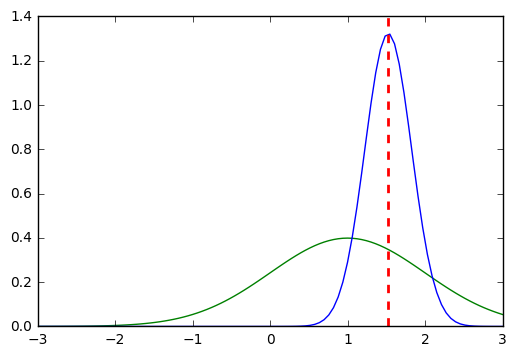

In [24]:
#consider a sample
y=array([ 2.74587306,  0.64806464,  2.05754964,  0.65176647,  2.20625446,
        2.55748078,  1.53610272,  1.64198212,  0.33260232,  1.39990185])
N=len(y)
sigma2=1 #given a unit distribution variance

#parameters of the normal prior
mu_prior=1
sigma2_prior=1

dist_prior=stats.norm(loc=mu_prior,scale=sigma2_prior**0.5)
x=np.linspace(-3,3,100)
plt.plot(x,dist_prior.pdf(x),color='g')

#estimate parameters of the posterior

sigma2_mu=(N/sigma2+1/sigma2_prior)**-1
mu_est=(np.sum(y)/sigma2+mu_prior/sigma2_prior)*sigma2_mu
dist=stats.norm(loc=mu_est,scale=sigma2_mu**0.5)
  
plt.plot(x,dist.pdf(x),color='b')
plt.axvline(mu_est, color='r', ls='--', lw=2.0)
print('Posterior distr = N({0},{1})'.format(mu_est,sigma2_mu))

# 3 Bayesian linear regression

Now lets further generalize the above Bayesian framework to a slightly more complicated case of a linear regression. Here we'll consider a simplest example of a univariate regression:
$$
y\sim {\cal N}(w x,\sigma^2),
$$
assuming that the variance $\sigma^2$ is given and the only real-valued single dimensional coefficient to estimate based on a series of single-dimensional observations $D=\{(y_i,x_i), i=1..N\}$ is $w$. In a similar manner as we just did for fitting a normal distribution, each single observation changes a given conjugate normal prior
$$
w\sim {\cal N}(w^*,\sigma^*)
$$
to a posterior
$$
p(w|y=y_i, x=x_i)\sim p(y=y_i|w,x=x_i)p(w)\sim e^{-\frac{(y_i-w x_i)^2}{2\sigma^2}-\frac{(w-w^*)^2}{2(\sigma^*)^2}}\sim
$$$$
\sim e^{-w^2 \frac{x_i^2(\sigma^*)^2+\sigma^2}{2\sigma^2(\sigma^*)^2}+w \frac{(\sigma^*)^2 y_i x_i+\sigma^2 w^*}{2\sigma^2(\sigma^*)^2}}
\sim e^{\frac{\left(w-\frac{ \sigma^{-2} y_i x_i +(\sigma^*)^{-2} w^*}{2 \left(x_i^2\sigma^{-2}+(\sigma^*)^{-2}\right)}\right)^2}{\frac{2 }{(\sigma^*)^{-2}+x_i^2\sigma^{-2}}}}
$$



So posterior is also normal (i.e. normal prior is conjugate for a linear regression fitting problem) with mean
$$
\hat{w}=\frac{\frac{y_i x_i}{\sigma^2}+\frac{w^*}{(\sigma^*)^2}}{\frac{x_i^2}{\sigma^2}+\frac{1}{(\sigma^*)^2}}
$$
and variance
$$
\hat{\sigma}^2=\left(\frac{x_i^2}{\sigma^2}+\frac{1}{(\sigma^*)^2}\right)^{-1}
$$
Then previous equation can be rewritten as
$$
\frac{\hat{w}}{\hat{\sigma}^2}=\frac{y_i x_i}{\sigma^2}+\frac{w^*}{(\sigma^*)^2}
$$
Now its easy to generalize the framework for the series of sequential observations $D=\{(y_i,x_i),i=1..N\}$:
$$
\hat{\sigma}^2=\left(\frac{\sum_i x_i^2}{\sigma^2}+\frac{1}{(\sigma^*)^2}\right)^{-1},
$$$$
\frac{\hat{w}}{\hat{\sigma}^2}=\frac{\sum_i y_i x_i}{\sigma^2}+\frac{w^*}{(\sigma^*)^2}.
$$
Specically if we do not have any prior knowledge on the distribution's shape, i.e. assume an uninfromative distribution with an infinitely large $\sigma^*$, then the estimate becomes simply:
$$
\hat{\sigma}^2=\frac{\sigma^2}{\sum_i x_i^2},
$$$$
\hat{w}=\frac{\sum_i y_i x_i}{\sum_i x_i^2}.
$$
The above estimate for $\hat{w}$ coincides with the classical least-square estimate, however Bayesian framework does not provide us just with this single estimate, but with the entire posterior distribution: 
$$
w\sim {\cal N}\left(\frac{\sum_i y_i x_i}{\sum_i x_i^2},\frac{\sigma^2}{\sum_i x_i^2}\right).
$$
This finally provides an intuitive explanation of where the linear regression slope coefficient's confidence interval is derived from. 

## 4. CAPM

Consider a real world example of stock prices. Major stocks offten follow corresponding indices to some extent. For example consider Apple stock prices retreived from Yahoo database using Quandl library vs NASDAQ Composite Index. According to www.quandl.com definition, the NASDAQ Composite Index measures all NASDAQ domestic and international based common type stocks listed on The NASDAQ Stock Market (world second stock market after NYSE). Today the NASDAQ Composite includes over 2,500 companies, more than most other stock market indexes. Because it is so broad-based, the Composite is one of the most widely followed and quoted major market indexes.

In [5]:
stocks = Quandl.get(["NASDAQOMX/COMP","YAHOO/AAPL"], trim_start="2005-9-1", 
                      trim_end="2015-9-1")
stocks.head()

,NASDAQOMX.COMP - Index Value,NASDAQOMX.COMP - High,NASDAQOMX.COMP - Low,NASDAQOMX.COMP - Total Market Value,NASDAQOMX.COMP - Dividend Market Value,YAHOO.AAPL - Open,YAHOO.AAPL - High,YAHOO.AAPL - Low,YAHOO.AAPL - Close,YAHOO.AAPL - Volume,YAHOO.AAPL - Adjusted Close
2005-09-01,2147.90,2157.32,2142.32,3.245075e+12,4.617763e+07,47.000001,47.170002,46.090000,46.260001,89091800.0,6.019410
2005-09-02,2141.70,2152.22,2139.28,3.234965e+12,1.775220e+07,46.300002,46.800000,46.120001,46.220000,55594700.0,6.014205
2005-09-06,2166.86,2167.10,2147.31,3.273975e+12,3.093261e+09,46.700001,48.880001,46.550001,48.799999,204654800.0,6.349918
2005-09-07,2172.30,2172.39,2158.61,3.281454e+12,1.658596e+08,49.050001,49.399999,47.919999,48.679999,240768500.0,6.334303
2005-09-08,2166.30,2173.85,2161.29,3.272416e+12,1.085546e+07,49.350001,50.119999,49.140000,49.780001,175660100.0,6.477437


In [6]:
stocks = stocks[['NASDAQOMX.COMP - Index Value','YAHOO.AAPL - Adjusted Close']]
stocks.columns=['NASDAQ','Aapl']

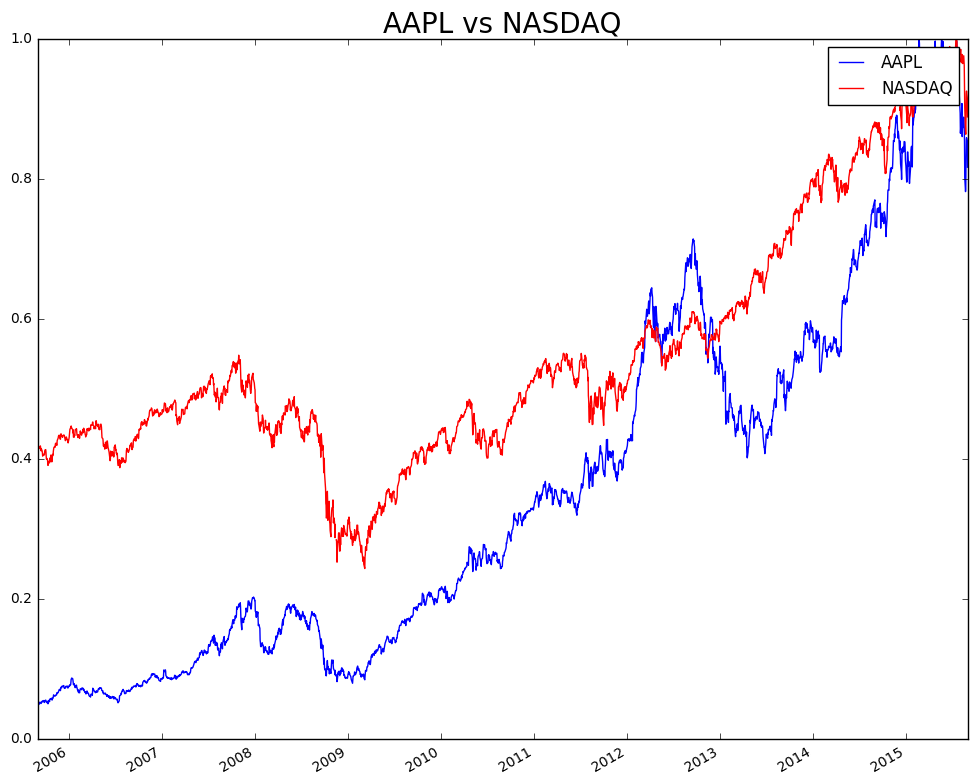

In [7]:
plt.figure(figsize = (12,10))
aaplN=stocks['Aapl']/max(stocks['Aapl'])
nasdaqN=stocks['NASDAQ']/max(stocks['NASDAQ'])
aaplN.plot(color='blue')
plt.title('AAPL vs NASDAQ', fontsize=20)
nasdaqN.plot(color='red')
plt.legend({'NASDAQ','AAPL'})

In [8]:
stocks['aapl'] = np.log(stocks['Aapl'] / stocks['Aapl'].shift(1))
stocks['nasdaq'] = np.log(stocks['NASDAQ'] / stocks['NASDAQ'].shift(1))
stocks=stocks.dropna()

(-0.1, 0.1)

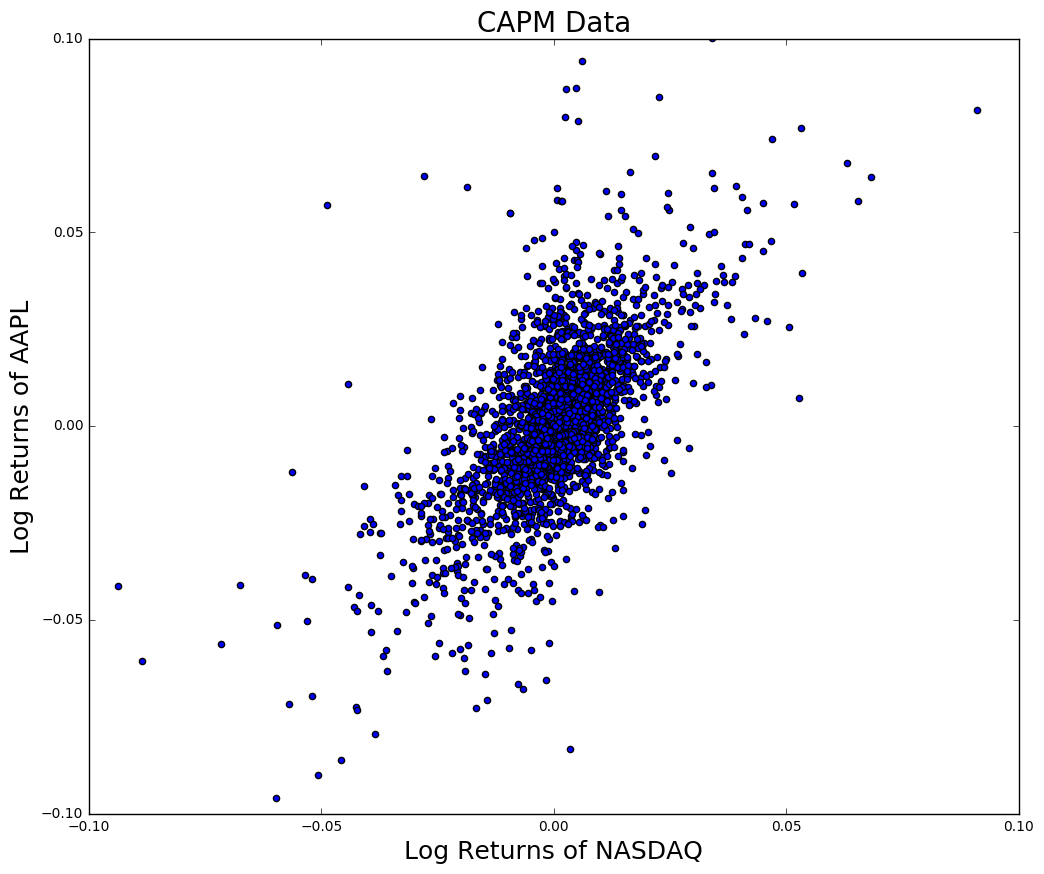

In [43]:
plt.figure(figsize = (12,10))
plt.scatter(stocks['nasdaq'],stocks['aapl'])
plt.title('CAPM Data', fontsize = 20)
plt.xlabel('Log Returns of NASDAQ', fontsize = 18)
plt.ylabel('Log Returns of AAPL', fontsize = 18)
plt.xlim([-0.1, 0.1])
plt.ylim([-0.1, 0.1])

In [10]:
stocks.head()

,NASDAQ,Aapl,aapl,nasdaq
2005-09-02,2141.70,6.014205,-0.000865,-0.002891
2005-09-06,2166.86,6.349918,0.054318,0.011679
2005-09-07,2172.30,6.334303,-0.002462,0.002507
2005-09-08,2166.30,6.477437,0.022345,-0.002766
2005-09-09,2175.51,6.676522,0.030272,0.004242


In [32]:
data=pd.DataFrame({'y':stocks['aapl'],'x':stocks['nasdaq']})
mod = smf.ols(formula='y ~ x ', data = data).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     1834.
Date:                Wed, 09 Nov 2016   Prob (F-statistic):          2.42e-301
Time:                        06:35:06   Log-Likelihood:                 6738.5
No. Observations:                2514   AIC:                        -1.347e+04
Df Residuals:                    2512   BIC:                        -1.346e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0008      0.000      2.503      0.0

In [33]:
sigma2=np.mean((data.y-mod.predict(data))**2)
sigma2

0.0002750126275621221

Posterior distr = N(1.02719372034,0.0239357877978^2)


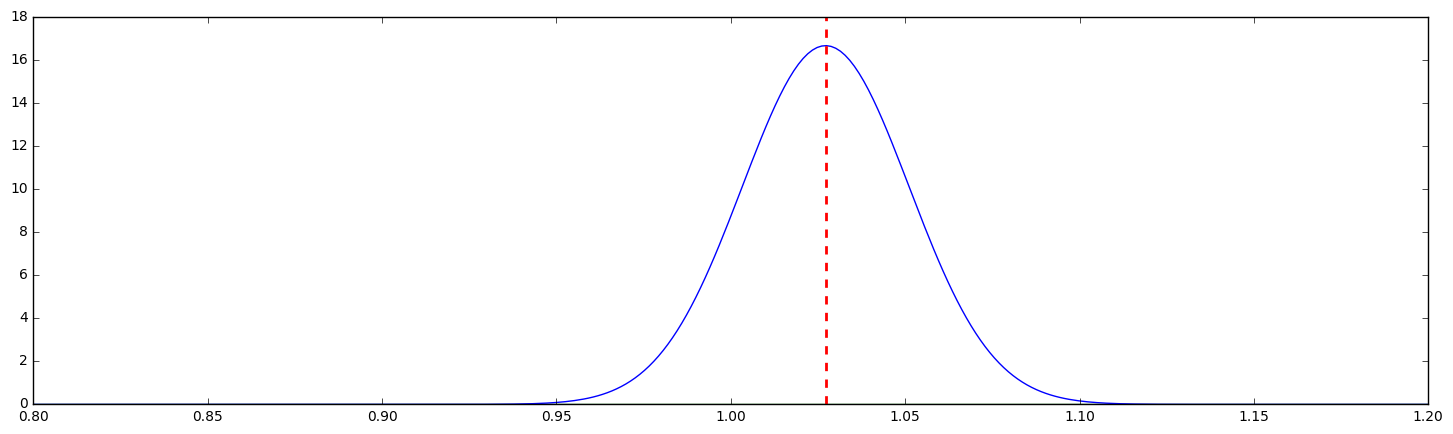

In [42]:
#now using the formulas for conjugate normal prior-posterior compute posterior's mean and variance/standard deviation,
#start from an uninformative prior N(1,1e6):
w_prior=0 #1
sigma2_prior=1e2 #decreasing - strength of the prior belief (down to -1-2)
#estimate parameters of the posterior
sigma2_w=(sum(data.x**2)/sigma2+1/sigma2_prior)**-1
w_est=(sum(data.x*data.y)/sigma2+w_prior/sigma2_prior)*sigma2_w
dist=stats.norm(loc=w_est,scale=sigma2_w**0.5)
dist_prior=stats.norm(loc=w_prior,scale=sigma2_prior**0.5)
print('Posterior distr = N({0},{1}^2)'.format(w_est,sigma2_w**0.5))
x=np.linspace(0.8,1.2,300)
plt.figure(figsize = (18,5))
plt.plot(x,dist_prior.pdf(x),color='g')
plt.plot(x,dist.pdf(x),color='b')
plt.axvline(w_est, color='r', ls='--', lw=2.0)

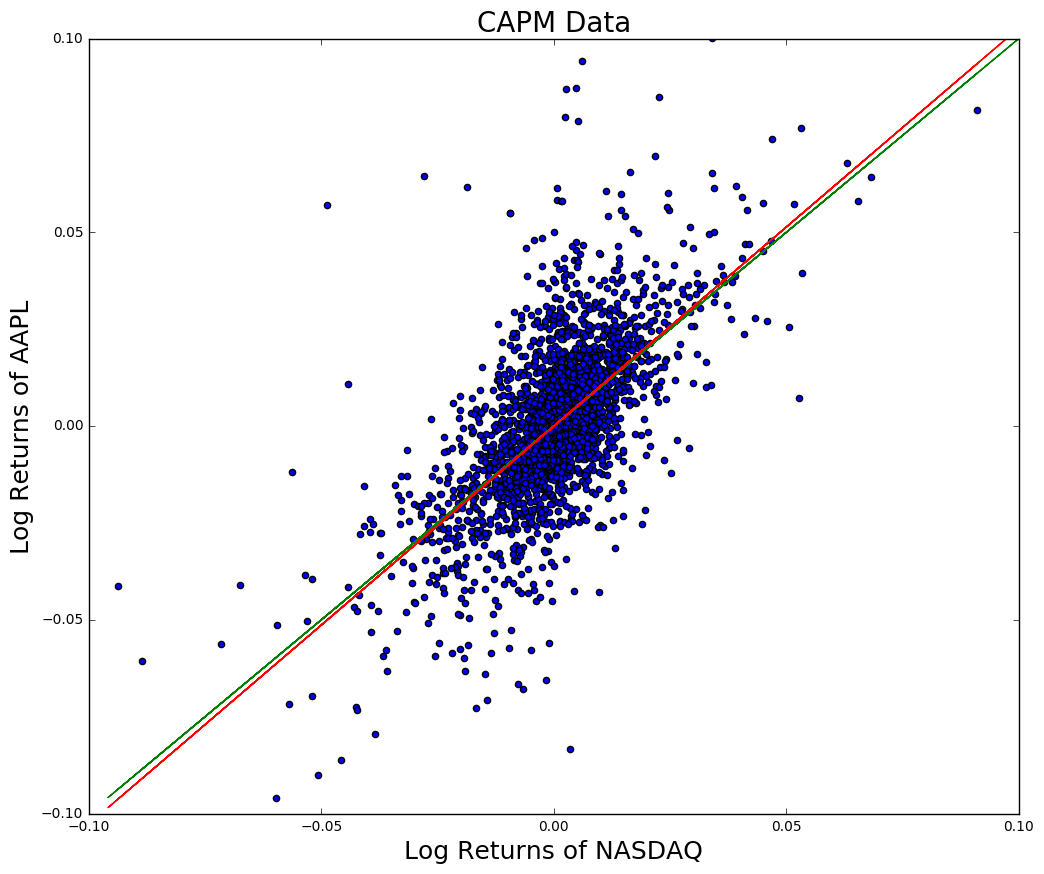

In [46]:
plt.figure(figsize = (12,10))
plt.scatter(data.x, data.y)
plt.title('CAPM Data', fontsize = 20)
plt.xlabel('Log Returns of NASDAQ', fontsize = 18)
plt.ylabel('Log Returns of AAPL', fontsize = 18)
plt.xlim([-0.1, 0.1])
plt.ylim([-0.1, 0.1])
yp=data.x
plt.plot(data.x, yp, 'g-')

yp=w_est*data.x
plt.plot(data.x, yp, 'r-')